# Tarea 5

## Tarea 5.1

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data_processed.csv")
df

,num_expediente,fecha,hora,localizacion,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,...,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,lesividad_Asistencia sanitaria ambulatoria con posterioridad,lesividad_Asistencia sanitaria inmediata en centro de salud o mutua,lesividad_Asistencia sanitaria sólo en el lugar del accidente,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Fallecido 24 horas,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria
0,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,HORTALEZA,Colisión doble,Lluvia débil,Motocicleta > 125cc,Conductor,De 55 a 59 años,...,0,0,0,0,0,0,0,1,0,0
1,2023S040280,2024-01-04,14:09:00,AVDA. NICETO ALCALA ZAMORA / AUTOV. M-11,HORTALEZA,Colisión doble,Lluvia débil,Turismo,Conductor,De 55 a 59 años,...,0,0,0,0,0,0,0,0,0,1
2,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,CENTRO,Colisión doble,Lluvia débil,Bicicleta,Conductor,De 25 a 29 años,...,0,0,0,0,1,0,0,0,0,0
3,2023S040309,2024-02-15,14:05:00,CALL. TESORO / CALL. MINAS,CENTRO,Colisión doble,Lluvia débil,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,...,0,0,0,0,0,0,0,0,0,1
4,2023S040310,2024-02-18,10:40:00,GTA. RUIZ JIMENEZ / CALL. SAN BERNARDO,CHAMBERÍ,Colisión doble,Despejado,Turismo,Conductor,De 25 a 29 años,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39686,2024S030621,2024-10-18,17:05:00,PLAZA. LIMA / AVDA. CONCHA ESPINA,CHAMARTÍN,Colisión doble,Despejado,Turismo,Conductor,De 45 a 49 años,...,0,0,0,0,0,0,0,0,0,1
39687,2024S031786,2024-10-11,02:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,MONCLOA-ARAVACA,Alcance,Despejado,Turismo,Conductor,De 25 a 29 años,...,0,0,0,0,0,0,0,0,0,1
39688,2024S031786,2024-10-11,02:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,MONCLOA-ARAVACA,Alcance,Despejado,Turismo,Conductor,De 25 a 29 años,...,0,0,0,0,0,0,0,0,0,1
39689,2024S031786,2024-10-11,02:00:00,CALL. PRINCESA / CALL. ALBERTO AGUILERA,MONCLOA-ARAVACA,Alcance,Despejado,Turismo,Pasajero,De 21 a 24 años,...,0,0,0,0,0,0,0,0,0,1


In [2]:
df_numeric = df.select_dtypes(include=[np.number])

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas numéricas
numeric_cols = df_numeric.select_dtypes(include=[np.number])

binary_cols = numeric_cols.columns[numeric_cols.nunique() == 2]

excluded_cols = ["dia_semana_sin", "dia_semana_cos", "rango_horario_sin", "rango_horario_cos"]

cols_to_scale = numeric_cols.columns.difference(binary_cols).difference(excluded_cols)

scaler = MinMaxScaler()
df_scaled = df_numeric.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [4]:
df_scaled.head()

,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,año,mes,es_fin_semana,calle_1_cod,calle_2_cod,es_cruce,...,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,lesividad_Asistencia sanitaria ambulatoria con posterioridad,lesividad_Asistencia sanitaria inmediata en centro de salud o mutua,lesividad_Asistencia sanitaria sólo en el lugar del accidente,lesividad_Atención en urgencias sin posterior ingreso,lesividad_Fallecido 24 horas,lesividad_Ingreso inferior o igual a 24 horas,lesividad_Ingreso superior a 24 horas,lesividad_Sin asistencia sanitaria
0,0.615240,0.631145,0,0.0,0.0,0.000000,0,0.167840,0.013390,1,...,0,0,0,0,0,0,0,1,0,0
1,0.615240,0.631145,0,0.0,0.0,0.000000,0,0.167840,0.013390,1,...,0,0,0,0,0,0,0,0,0,1
2,0.427963,0.405960,0,0.0,0.0,0.111111,0,0.790088,0.614436,1,...,0,0,0,0,1,0,0,0,0,0
3,0.427963,0.405960,0,0.0,0.0,0.111111,0,0.790088,0.614436,1,...,0,0,0,0,0,0,0,0,0,1
4,0.428510,0.425790,0,0.0,0.0,0.111111,1,0.890632,0.730336,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df_scaled = df_scaled.select_dtypes(include=['number'])

In [6]:
from sklearn.decomposition import PCA
import pandas as pd

# Ajustar PCA para conservar el 90% de la variabilidad
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_scaled)

print(f"Componentes seleccionados: {pca.n_components_}")
explained_variance = pca.explained_variance_ratio_.cumsum()
print(f"Varianza explicada acumulada: {explained_variance[-1]:.2f}")

df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print(df_pca.head())

Componentes seleccionados: 44
Varianza explicada acumulada: 0.90
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.782334 -0.960391 -0.101075  0.983561 -0.470611  0.445999 -0.808160   
1  0.653046 -1.008010 -0.206625  0.785937 -0.381430 -0.042427  0.680641   
2  0.725795 -0.956734 -0.120426  0.869575 -0.411182  0.317779 -1.090942   
3  0.736461 -0.958238 -0.062860  0.780874 -0.254279  0.691386 -0.343465   
4 -1.067902  0.926811  0.538456  0.812526 -0.428002  0.405427  0.433513   

        PC8       PC9      PC10  ...      PC35      PC36      PC37      PC38  \
0  0.178916 -0.600605 -0.752931  ... -0.359748 -0.679709  0.036524  0.073184   
1  0.327274 -1.047758 -0.432993  ...  0.122291 -0.188757  0.019863  0.059000   
2 -0.099004 -0.753573 -0.633647  ... -0.416164 -0.075564  0.361621 -0.043972   
3  0.007083 -0.359389 -0.974988  ...  0.050570  0.370910  0.087776 -0.068964   
4  0.149672  0.040299  0.045005  ...  0.113291 -0.136884 -0.202363  0.123487   

   

In [7]:
X = df_scaled.to_numpy()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [9]:
# Probar diferentes valores de min_cluster_size
min_cluster_sizes = range(10, 500, 10)
results = []

for size in min_cluster_sizes:
    print(size)
    clusterer = hdbscan.HDBSCAN(min_cluster_size=size, metric='euclidean')
    labels = clusterer.fit_predict(X)
    
    # Calcular métricas solo si hay más de un clúster
    if len(set(labels)) > 1:  # Evitar casos sin clusters
        silhouette = silhouette_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        results.append((size, len(set(labels)), silhouette, calinski_harabasz))
        print("Resultado valido")

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=['min_cluster_size', 'n_clusters', 'silhouette', 'calinski_harabasz'])
results_df

10


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Resultado valido
20


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Resultado valido
30


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Resultado valido
40


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


50


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


60


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


70


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


80


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


90


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


100


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


110


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


120


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


130


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


140


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


150


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


160


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


170


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


180


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


190


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


200


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


210


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


220


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


230


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


240


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


250


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


260


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


270


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


280


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


290


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


300


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


310


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


320


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


330


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


340


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


350


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


360


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


370


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


380


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


390


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


400


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


410


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


420


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


430


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


440


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


450


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


460


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


470


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


480


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


490


C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\nacho\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,min_cluster_size,n_clusters,silhouette,calinski_harabasz
0,10,3,0.012749,485.190901
1,20,3,-0.134896,33.225401
2,30,3,-0.138749,24.136790


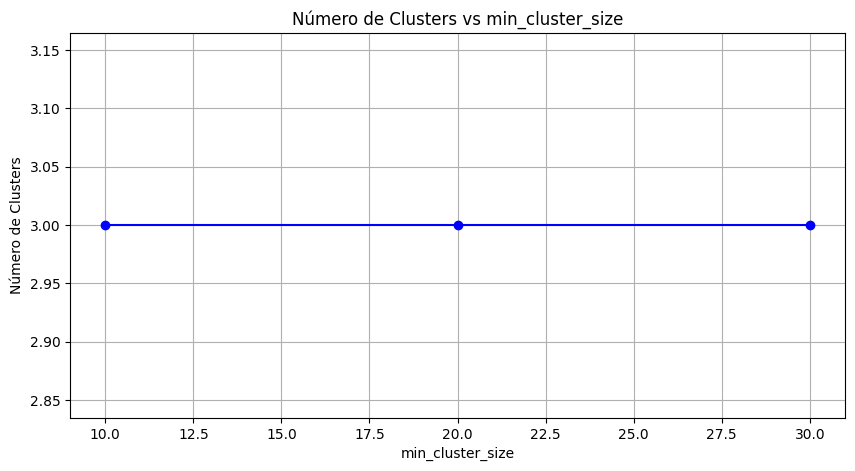

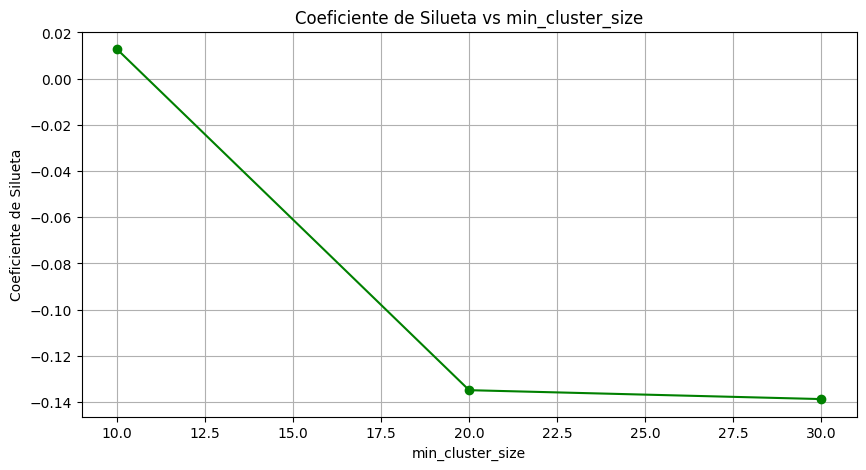

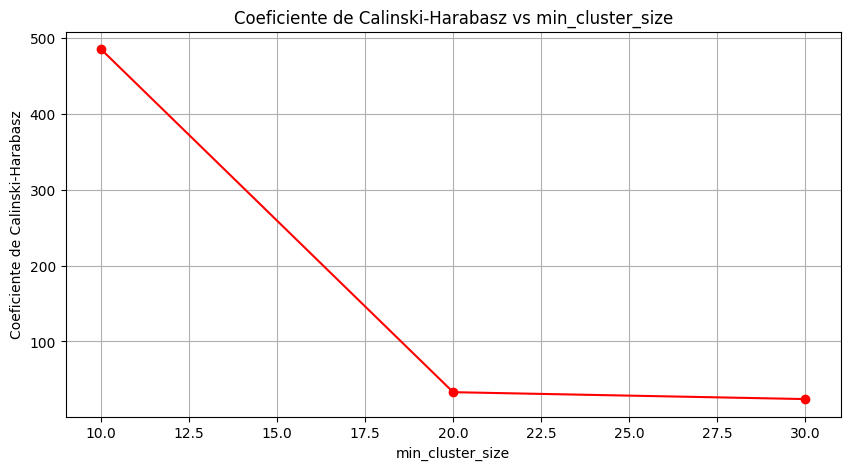

In [10]:
import matplotlib.pyplot as plt

# Gráfico del número de clusters vs min_cluster_size
plt.figure(figsize=(10, 5))
plt.plot(results_df['min_cluster_size'], results_df['n_clusters'], marker='o', color='b')
plt.title("Número de Clusters vs min_cluster_size")
plt.xlabel("min_cluster_size")
plt.ylabel("Número de Clusters")
plt.grid(True)
plt.show()

# Gráfico del coeficiente de silueta vs min_cluster_size
plt.figure(figsize=(10, 5))
plt.plot(results_df['min_cluster_size'], results_df['silhouette'], marker='o', color='g')
plt.title("Coeficiente de Silueta vs min_cluster_size")
plt.xlabel("min_cluster_size")
plt.ylabel("Coeficiente de Silueta")
plt.grid(True)
plt.show()

# Gráfico del coeficiente de Calinski-Harabasz vs min_cluster_size
plt.figure(figsize=(10, 5))
plt.plot(results_df['min_cluster_size'], results_df['calinski_harabasz'], marker='o', color='r')
plt.title("Coeficiente de Calinski-Harabasz vs min_cluster_size")
plt.xlabel("min_cluster_size")
plt.ylabel("Coeficiente de Calinski-Harabasz")
plt.grid(True)
plt.show()

### Comparacion

In [23]:
import pandas as pd

resultados = pd.read_csv("resultados_clustering.csv")
resultados

,Algoritmo,Indice,Valor,N_clusters
0,AglomerativeClustering,Calinski-Harabasz,92.157137,2
1,AglomerativeClustering,Davies-Bouldin,111.945956,2
2,AglomerativeClustering,Silhouette,0.224167,2
3,AglomerativeClustering,Calinski-Harabasz,60.208460,3
4,AglomerativeClustering,Davies-Bouldin,52.895047,3
...,...,...,...,...
500,Dbscan,Calinski-Harabasz,106.408292,10
501,Dbscan,Silhouette,-0.046186,5
502,Dbscan,Calinski-Harabasz,205.242566,5
503,Dbscan,Silhouette,-0.042130,4


In [27]:
resultados = resultados[resultados["N_clusters"] < 100]

In [28]:
import pandas as pd

df_dbscan = resultados[resultados['Algoritmo'] == 'Dbscan'].copy()
df_otros = resultados[resultados['Algoritmo'] != 'Dbscan'].copy()

df_dbscan_sil = df_dbscan[df_dbscan['Indice'] == 'Silhouette'].copy()
df_dbscan_no_sil = df_dbscan[df_dbscan['Indice'] != 'Silhouette'].copy()

df_dbscan_sil = (
    df_dbscan_sil
    .sort_values('Valor', ascending=False)
    .drop_duplicates(subset='N_clusters', keep='first')  
)

df_dbscan_filtrado = pd.concat([df_dbscan_sil, df_dbscan_no_sil],
                               ignore_index=True)

# 5) Unimos con el resto de algoritmos
df_filtrado = pd.concat([df_otros, df_dbscan_filtrado], 
                        ignore_index=True)

In [31]:
df_filtrado[df_filtrado['Algoritmo'] == 'Kmeans']

,Algoritmo,Indice,Valor,N_clusters
54,Kmeans,Silhouette,0.066919,2
55,Kmeans,Silhouette,0.060348,3
56,Kmeans,Silhouette,0.070544,4
57,Kmeans,Silhouette,0.061791,5
58,Kmeans,Silhouette,0.060270,6
59,Kmeans,Silhouette,0.051588,7
60,Kmeans,Silhouette,0.049584,8
61,Kmeans,Silhouette,0.053187,9
62,Kmeans,Silhouette,0.050369,10
63,Kmeans,Silhouette,0.047492,11


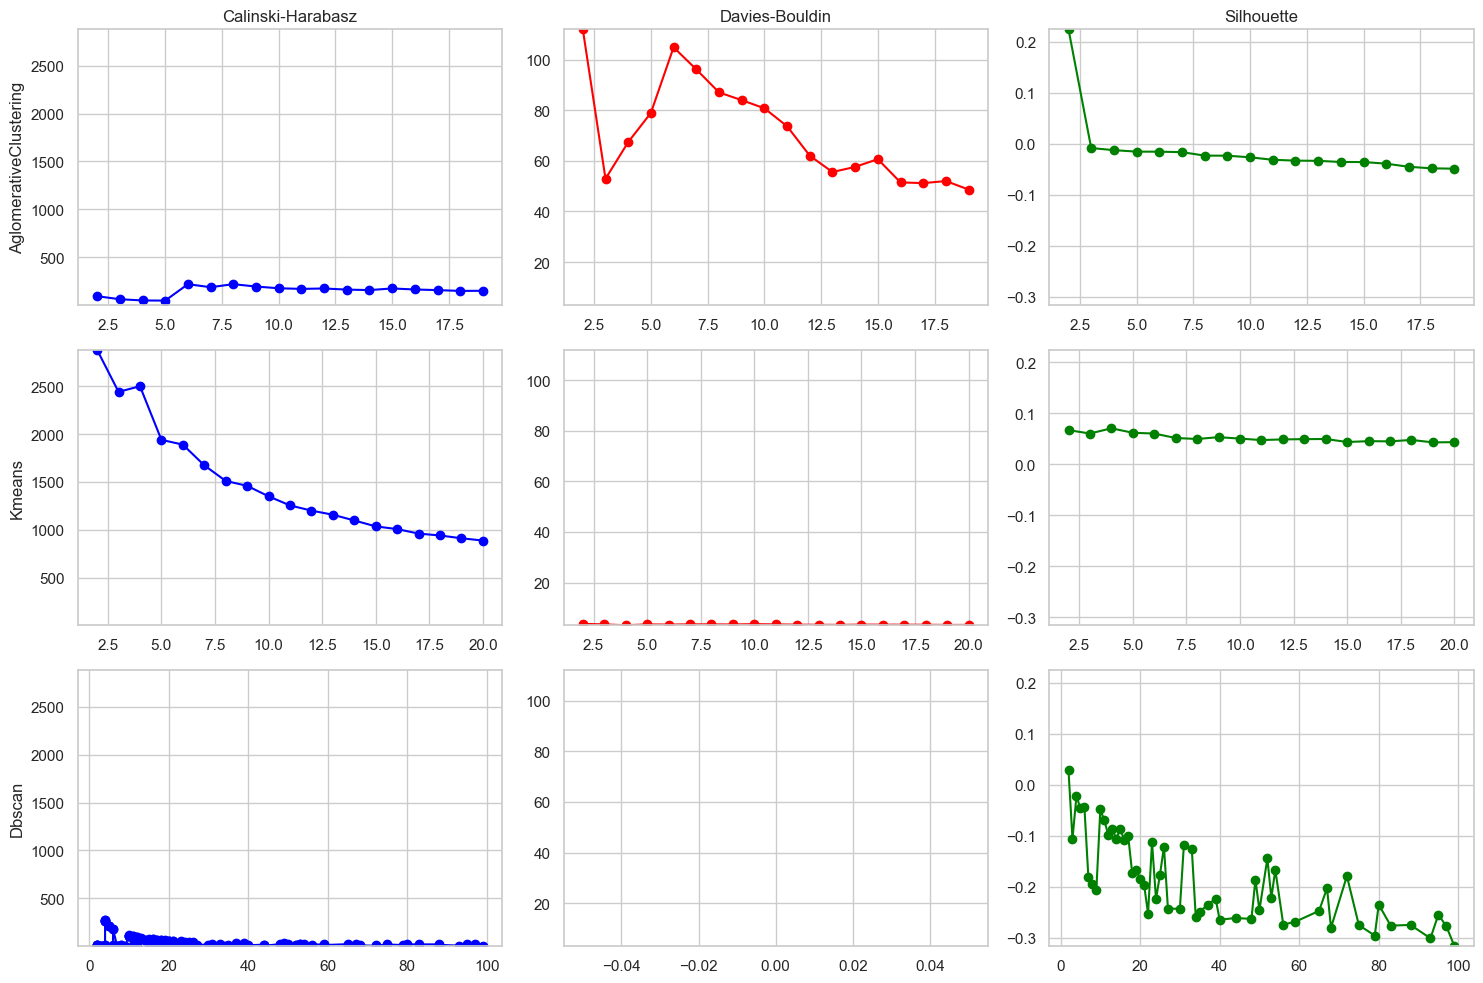

In [30]:
import matplotlib.pyplot as plt

indices = ['Calinski-Harabasz', 'Davies-Bouldin', 'Silhouette']
algoritmos = ['AglomerativeClustering', 'Kmeans', 'Dbscan']

y_lims = {}
for ind in indices:
    df_temp = df_filtrado[df_filtrado['Indice'] == ind]
    y_min = df_temp['Valor'].min()
    y_max = df_temp['Valor'].max()
    y_lims[ind] = (y_min, y_max)

colores = {
    'Calinski-Harabasz': 'blue',
    'Davies-Bouldin': 'red',
    'Silhouette': 'green'
}

fig, axs = plt.subplots(nrows=len(algoritmos),
                        ncols=len(indices),
                        figsize=(15, 10),
                        sharex=False,
                        sharey=False)

for row, alg in enumerate(algoritmos):
    for col, ind in enumerate(indices):
        ax = axs[row, col]
        
        mask = (df_filtrado['Algoritmo'] == alg) & (df_filtrado['Indice'] == ind)
        df_plot = df_filtrado[mask].sort_values(by='N_clusters')
        
        x = df_plot['N_clusters']
        y = df_plot['Valor']
        
        ax.plot(x, y, marker='o', color=colores[ind], label=ind)
        
        ax.set_ylim(y_lims[ind])
        
        # Etiquetas
        if row == 0:
            ax.set_title(ind)
        if col == 0:
            ax.set_ylabel(alg)

plt.tight_layout()
plt.show()


Observando estas gráficas se pueden sacar varias conclusiones:
- El algoritmo de Dbscan no funciona demasiado bien para este dataset, al menos según los índices de los que se disponen. Pues ofrece resultados significativamente peores que el resto de algoritmos
- Se puede apreciar que el algoritmo que mejor funciona es el de Kmeans, pues sus valores para todos los índices son bastante buenos.
- En comparación con el HDBSCAN, los 2 primeros algoritmos que se muestran, son mejores. El HDBSCAN, al igual que el DBSCAN no muestra buenos resultados, tal vez debido a la alta dimensionalidad del dataset.